In [31]:
import requests, zipfile, io
import shutil
import os.path
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [32]:
shutil.rmtree('__MACOSX') 
if not os.path.exists('data_stocks.csv'):
    r = requests.get('http://files.statworx.com/sp500.zip', stream=True)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall()
    shutil.rmtree('__MACOSX') 

In [4]:
# Import data
df = pd.read_csv('data_stocks.csv')
# Drop date variable
df = df.drop(['DATE'], 1)
# Dimensions of dataset
n = df.shape[0]
p = df.shape[1]
data = df.values

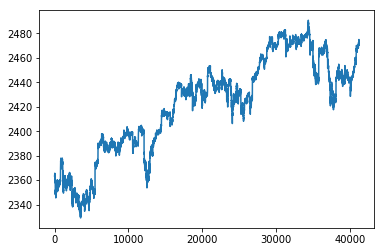

In [5]:
plt.plot(df['SP500'])

In [6]:
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

# Build X and y
x_train = data_train[:, 1:]
y_train = data_train[:, 0]
x_test = data_test[:, 1:]
y_test = data_test[:, 0]

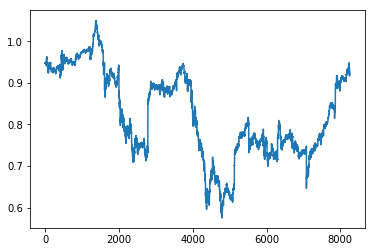

In [8]:
plt.plot(np.arange(len(x_test)), y_test)

In [22]:
model = Sequential()
model.add(Dense(1024, input_dim=500, kernel_initializer='normal', activation='relu'))
model.add(Dense(512, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# For a mean squared error regression problem
model.compile(optimizer='rmsprop', loss='mse')
model.fit(x_train, y_train, epochs=1000, batch_size=500, validation_data=(x_test, y_test))

Train on 33012 samples, validate on 8254 samples
Epoch 1/1000
33012/33012 [==============================] - 1s 26us/step - loss: 1.6420 - val_loss: 0.0917
Epoch 2/1000
33012/33012 [==============================] - 1s 19us/step - loss: 0.0325 - val_loss: 0.0219
Epoch 3/1000
33012/33012 [==============================] - 1s 19us/step - loss: 0.0137 - val_loss: 0.0290
Epoch 4/1000
33012/33012 [==============================] - 1s 19us/step - loss: 0.0084 - val_loss: 0.0066
Epoch 5/1000
33012/33012 [==============================] - 1s 19us/step - loss: 0.0056 - val_loss: 0.0213
Epoch 6/1000
33012/33012 [==============================] - 1s 19us/step - loss: 0.0043 - val_loss: 0.0084
Epoch 7/1000
33012/33012 [==============================] - 1s 19us/step - loss: 0.0037 - val_loss: 0.0416
Epoch 8/1000
33012/33012 [==============================] - 1s 18us/step - loss: 0.0032 - val_loss: 0.0110
Epoch 9/1000
33012/33012 [==============================] - 1s 19us/step - loss: 0.0028 - val_l

Epoch 75/1000
33012/33012 [==============================] - 1s 18us/step - loss: 4.8428e-04 - val_loss: 0.0160
Epoch 76/1000
33012/33012 [==============================] - 1s 19us/step - loss: 4.6900e-04 - val_loss: 0.0056
Epoch 77/1000
33012/33012 [==============================] - 1s 19us/step - loss: 4.5852e-04 - val_loss: 0.0108
Epoch 78/1000
33012/33012 [==============================] - 1s 19us/step - loss: 4.8518e-04 - val_loss: 0.0082
Epoch 79/1000
33012/33012 [==============================] - 1s 18us/step - loss: 4.6477e-04 - val_loss: 0.0114
Epoch 80/1000
33012/33012 [==============================] - 1s 18us/step - loss: 4.5242e-04 - val_loss: 0.0069
Epoch 81/1000
33012/33012 [==============================] - 1s 19us/step - loss: 4.5233e-04 - val_loss: 0.0136
Epoch 82/1000
33012/33012 [==============================] - 1s 18us/step - loss: 4.7516e-04 - val_loss: 0.0067
Epoch 83/1000
33012/33012 [==============================] - 1s 18us/step - loss: 4.4480e-04 - val_loss:

33012/33012 [==============================] - 1s 18us/step - loss: 2.8340e-04 - val_loss: 0.0070
Epoch 148/1000
33012/33012 [==============================] - 1s 18us/step - loss: 2.8409e-04 - val_loss: 0.0133
Epoch 149/1000
33012/33012 [==============================] - 1s 18us/step - loss: 2.7763e-04 - val_loss: 0.0080
Epoch 150/1000
33012/33012 [==============================] - 1s 18us/step - loss: 2.7181e-04 - val_loss: 0.0197
Epoch 151/1000
33012/33012 [==============================] - 1s 19us/step - loss: 2.7376e-04 - val_loss: 0.0122
Epoch 152/1000
33012/33012 [==============================] - 1s 18us/step - loss: 2.6617e-04 - val_loss: 0.0089
Epoch 153/1000
33012/33012 [==============================] - 1s 19us/step - loss: 2.6550e-04 - val_loss: 0.0135
Epoch 154/1000
33012/33012 [==============================] - 1s 18us/step - loss: 2.6443e-04 - val_loss: 0.0071
Epoch 155/1000
33012/33012 [==============================] - 1s 18us/step - loss: 2.6642e-04 - val_loss: 0.014

33012/33012 [==============================] - 1s 19us/step - loss: 1.7750e-04 - val_loss: 0.0132
Epoch 220/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.6744e-04 - val_loss: 0.0128
Epoch 221/1000
33012/33012 [==============================] - 1s 19us/step - loss: 1.7908e-04 - val_loss: 0.0115
Epoch 222/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.7185e-04 - val_loss: 0.0140
Epoch 223/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.7152e-04 - val_loss: 0.0153
Epoch 224/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.6997e-04 - val_loss: 0.0125
Epoch 225/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.7179e-04 - val_loss: 0.0151
Epoch 226/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.7110e-04 - val_loss: 0.0113
Epoch 227/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.7122e-04 - val_loss: 0.011

33012/33012 [==============================] - 1s 18us/step - loss: 1.3847e-04 - val_loss: 0.0127
Epoch 292/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.3881e-04 - val_loss: 0.0202
Epoch 293/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.4109e-04 - val_loss: 0.0112
Epoch 294/1000
33012/33012 [==============================] - 1s 19us/step - loss: 1.3972e-04 - val_loss: 0.0117
Epoch 295/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.3551e-04 - val_loss: 0.0155
Epoch 296/1000
33012/33012 [==============================] - 1s 19us/step - loss: 1.4434e-04 - val_loss: 0.0118
Epoch 297/1000
33012/33012 [==============================] - 1s 19us/step - loss: 1.3561e-04 - val_loss: 0.0186
Epoch 298/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.3794e-04 - val_loss: 0.0141
Epoch 299/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.3850e-04 - val_loss: 0.022

33012/33012 [==============================] - 1s 18us/step - loss: 1.2196e-04 - val_loss: 0.0134
Epoch 364/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.1992e-04 - val_loss: 0.0171
Epoch 365/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.1565e-04 - val_loss: 0.0130
Epoch 366/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.2014e-04 - val_loss: 0.0160
Epoch 367/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.1428e-04 - val_loss: 0.0165
Epoch 368/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.2060e-04 - val_loss: 0.0131
Epoch 369/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.1586e-04 - val_loss: 0.0191
Epoch 370/1000
33012/33012 [==============================] - 1s 18us/step - loss: 1.1742e-04 - val_loss: 0.0093
Epoch 371/1000
33012/33012 [==============================] - 1s 19us/step - loss: 1.1745e-04 - val_loss: 0.013

KeyboardInterrupt: 

In [18]:
score = model.evaluate(x_test, y_test, batch_size=128)
print(score)

8254/8254 [==============================] - 0s 15us/step
0.003140626305260436


In [23]:
y_test_predict = model.predict(x_test)
y_train_predict = model.predict(x_train)

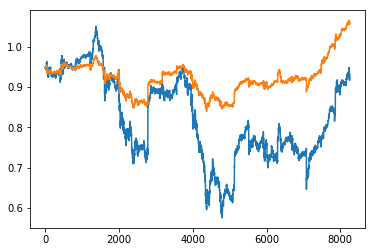

In [25]:
plt.plot(np.arange(len(x_test)), y_test)
plt.plot(np.arange(len(x_test)), y_test_predict)

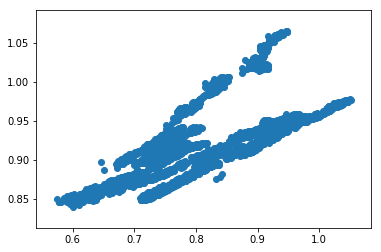

In [26]:
plt.scatter(y_test, y_test_predict)

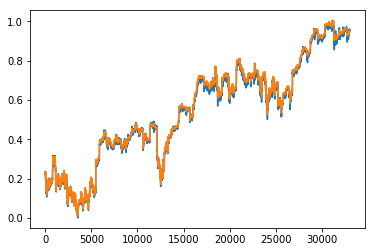

In [24]:
plt.plot(np.arange(len(x_train)), y_train)
plt.plot(np.arange(len(x_train)), y_train_predict)